In [7]:
import re
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split

In [8]:
def fetch_papers():
    with open('archive/arxiv-metadata-oai-snapshot.json', 'r') as f:
        for paper in f:
            yield paper

In [9]:
papers = fetch_papers()
dataframe = {
"title": [],
"authors": [],
"abstract": [],
"journal-ref": [],
"categories": [],
"update_date": []
}

In [11]:
for ind, paper in enumerate(papers):
    paper = json.loads(paper)
    if (category := re.findall(r'\bcs.[A-Z]{2}\w*', paper["categories"])) != []:
        try:
            dataframe["title"].append(paper["title"])
            dataframe["authors"].append(paper["authors"])
            dataframe["abstract"].append(paper["abstract"])
            dataframe["journal-ref"].append(paper["journal-ref"])
            dataframe["categories"].append(category)
            dataframe["update_date"].append(paper["update_date"])
        except:
            pass

In [10]:
for ind, paper in enumerate(papers):
    paper = json.loads(paper)
    try:
        dataframe["title"].append(paper["title"])
        dataframe["authors"].append(paper["authors"])
        dataframe["abstract"].append(paper["abstract"])
        dataframe["journal-ref"].append(paper["journal-ref"])
        dataframe["categories"].append(paper["categories"])  # No filtering
        dataframe["update_date"].append(paper["update_date"])
    except:
        pass

In [11]:
research_papers = pd.DataFrame(dataframe)

In [12]:
research_papers["update_date"] = pd.to_datetime(research_papers["update_date"])

In [13]:
research_papers

,title,authors,abstract,journal-ref,categories,update_date
0,Calculation of prompt diphoton production cros...,"C. Bal\'azs, E. L. Berger, P. M. Nadolsky, C.-...",A fully differential calculation in perturba...,"Phys.Rev.D76:013009,2007",hep-ph,2008-11-26
1,Sparsity-certifying Graph Decompositions,Ileana Streinu and Louis Theran,"We describe a new algorithm, the $(k,\ell)$-...",None,math.CO cs.CG,2008-12-13
2,The evolution of the Earth-Moon system based o...,Hongjun Pan,The evolution of Earth-Moon system is descri...,None,physics.gen-ph,2008-01-13
3,A determinant of Stirling cycle numbers counts...,David Callan,We show that a determinant of Stirling cycle...,None,math.CO,2007-05-23
4,From dyadic $\Lambda_{\alpha}$ to $\Lambda_{\a...,Wael Abu-Shammala and Alberto Torchinsky,In this paper we show how to compute the $\L...,"Illinois J. Math. 52 (2008) no.2, 681-689",math.CA math.FA,2013-10-15
...,...,...,...,...,...,...
2610985,On the origin of the irreversibility line in t...,"R. Prozorov, M. Konczykowski, B. Schmidt, Y. Y...",We report on measurements of the angular dep...,None,supr-con cond-mat.supr-con,2009-10-30
2610986,Nonlinear Response of HTSC Thin Film Microwave...,"Durga P. Choudhury, Balam A. Willemsen, John S...",The non-linear microwave surface impedance o...,None,supr-con cond-mat.supr-con,2016-11-18
2610987,Critical State Flux Penetration and Linear Mic...,"Balam A. Willemsen, J. S. Derov and S.Sridhar ...",The vortex contribution to the dc field (H) ...,None,supr-con cond-mat.supr-con,2009-10-30
2610988,Density of States and NMR Relaxation Rate in A...,Yasumasa Hasegawa (Himeji Institute of Technol...,We show that the density of states in an ani...,None,supr-con cond-mat.supr-con,2009-10-30


In [57]:
research_papers.to_csv('research_papers.csv', index=False)

In [14]:
research_papers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2610990 entries, 0 to 2610989
Data columns (total 6 columns):
 #   Column       Dtype         
---  ------       -----         
 0   title        object        
 1   authors      object        
 2   abstract     object        
 3   journal-ref  object        
 4   categories   object        
 5   update_date  datetime64[ns]
dtypes: datetime64[ns](1), object(5)
memory usage: 119.5+ MB


# Model 1 - Paper recommendation system based on user input

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Use the abstract text for TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', lowercase=True, max_features=10000)
paper_vectors = tfidf_vectorizer.fit_transform(research_papers['abstract'])

In [58]:
import pickle

# Save the sparse matrix to a file
with open('tfidf_matrix.pkl', 'wb') as f:
    pickle.dump(paper_vectors, f)

In [17]:
#Testing with user input
user_input = "quantum computing and machine learning"

#TF-IDF
user_vector = tfidf_vectorizer.transform([user_input])
print(user_vector)

  (0, 1843)	0.5900258386002493
  (0, 5131)	0.4270592878642597
  (0, 5395)	0.5482794053708862
  (0, 7269)	0.4109495931122103


In [18]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute cosine similarity (for TF-IDF)
cosine_similarities_tfidf = cosine_similarity(user_vector, paper_vectors)
print(cosine_similarities_tfidf)

[[0.02417596 0.         0.         ... 0.         0.         0.        ]]


In [50]:
import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
nltk.download('punkt_tab')

def preprocess_text(text):
    # Example preprocessing steps
    text = text.lower()  
    tokens = word_tokenize(text) 
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Remove stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatize
    return " ".join(tokens)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mitta\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mitta\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [47]:
def get_query_based_recommendations(query: str, tfidf_matrix, num_rec: int) -> list:
    # Preprocess the query (similar preprocessing as your papers' abstracts)
    query = preprocess_text(query)
    
    # Vectorize the user query
    query_vector = tfidf_vectorizer.transform([query])  # Using the same tfidf_vectorizer for query vectorization
    
    # Calculate cosine similarity between query vector and all paper abstract vectors
    sim = cosine_similarity(query_vector, tfidf_matrix)  # shape (1, n_papers)
    sim = sim.reshape(sim.shape[1])  # Flatten to shape (n_papers,)
    
    # Get the indices of the top n similar papers (highest cosine similarity)
    top_n_idx = np.argsort(-sim)[:num_rec]
    top_n_id = research_papers.iloc[top_n_idx]
    #top_n_id = [final_df['id'][x] for x in top_n_idx]
    return top_n_id[['title','abstract', 'authors']]

In [51]:
user_input = "quantum computing and machine learning"
get_query_based_recommendations(user_input, paper_vectors, 10)

,title,abstract,authors
2191830,Quantum Machine Learning: An Interplay Between...,Quantum machine learning (QML) is a rapidly ...,"Jun Qi, Chao-Han Yang, Samuel Yen-Chi Chen, Pi..."
1377638,Quantum reservoir computing: a reservoir appro...,Quantum systems have an exponentially large ...,Keisuke Fujii and Kohei Nakajima
1809288,Challenges and Opportunities in Quantum Machin...,At the intersection of machine learning and ...,"M. Cerezo, Guillaume Verdon, Hsin-Yuan Huang, ..."
1306784,Classification with Quantum Machine Learning: ...,Due to the superiority and noteworthy progre...,"Zainab Abohashima, Mohamed Elhosen, Essam H. H..."
2112442,Quantum Hamiltonian Embedding of Images for Da...,When applying quantum computing to machine l...,"Peiyong Wang, Casey R. Myers, Lloyd C. L. Holl..."
1288377,Quantum Machine Learning in High Energy Physics,Machine learning has been used in high energ...,"Wen Guan, Gabriel Perdue, Arthur Pesah, Maria ..."
1833744,Expressive Quantum Supervised Machine Learning...,Quantum machine learning with variational qu...,"Yuichiro Mori, Kouhei Nakaji, Yuichiro Matsuza..."
1521080,Quantum Machine Learning for Health State Diag...,Quantum computing is a new field that has re...,"Gabriel San Mart\'in, Enrique L\'opez Droguett"
2091550,Machine Learning Applications of Quantum Compu...,At the intersection of quantum computing and...,"Thien Nguyen, Tuomo Sipola and Jari Hautam\""aki"
1306539,Quantum Computing Methods for Supervised Learning,The last two decades have seen an explosive ...,"Viraj Kulkarni, Milind Kulkarni, Aniruddha Pant"


In [19]:
cosine_similarities_flat = cosine_similarities_tfidf.flatten()

top_20_indices = np.argsort(cosine_similarities_flat)[::-1][:20]  # Sort in descending order and get the top 20

# Print the top 20 indices
print("Top 20 indices of recommended papers:", top_20_indices)

top_20_papers = research_papers.iloc[top_20_indices]

print(top_20_papers[['title', 'abstract', 'categories']])

Top 20 indices of recommended papers: [2191830 1377638 1809288 1306784 2112442 1288377 1833744 1521080 2091550
 1306539 1142361 1990905 1320807 2012333 2115548 2130118 1637630 2100940
 1488478 1589465]
                                                     title  \
2191830  Quantum Machine Learning: An Interplay Between...   
1377638  Quantum reservoir computing: a reservoir appro...   
1809288  Challenges and Opportunities in Quantum Machin...   
1306784  Classification with Quantum Machine Learning: ...   
2112442  Quantum Hamiltonian Embedding of Images for Da...   
1288377    Quantum Machine Learning in High Energy Physics   
1833744  Expressive Quantum Supervised Machine Learning...   
1521080  Quantum Machine Learning for Health State Diag...   
2091550  Machine Learning Applications of Quantum Compu...   
1306539  Quantum Computing Methods for Supervised Learning   
1142361  Machine learning methods in quantum computing ...   
1990905  A comprehensive review of Quantum Machine Lea

In [20]:
top_20_papers['abstract']

2191830      Quantum machine learning (QML) is a rapidly ...
1377638      Quantum systems have an exponentially large ...
1809288      At the intersection of machine learning and ...
1306784      Due to the superiority and noteworthy progre...
2112442      When applying quantum computing to machine l...
1288377      Machine learning has been used in high energ...
1833744      Quantum machine learning with variational qu...
1521080      Quantum computing is a new field that has re...
2091550      At the intersection of quantum computing and...
1306539      The last two decades have seen an explosive ...
1142361      Classical machine learning theory and theory...
1990905      Quantum machine learning, which involves run...
1320807      Through superposition, a quantum computer is...
2012333      This paper provides an introduction to quant...
2115548      Recent advancements in quantum computing hav...
2130118      Quantum machine learning, which involves run...
1637630      Recently, t

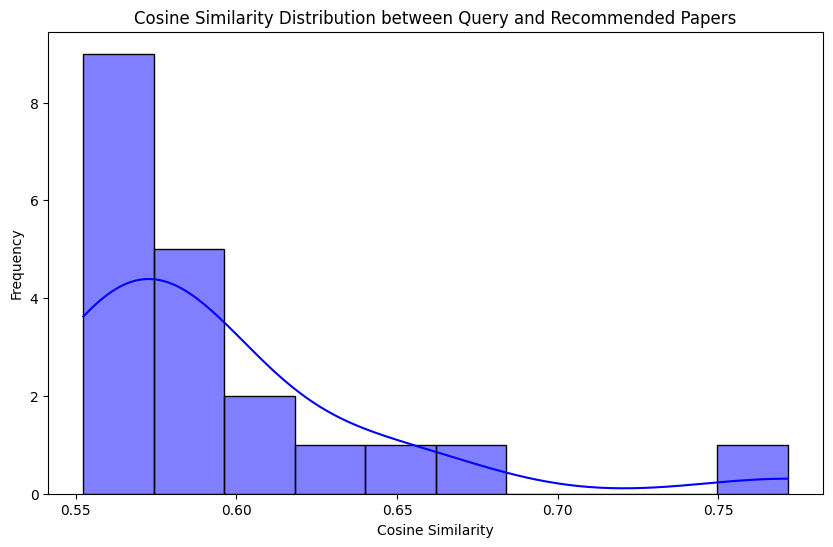

In [21]:
#Cosine Similarity Distribution
recommended_papers_tfidf = tfidf_vectorizer.transform(top_20_papers['abstract'])

similarities = cosine_similarity(user_vector, recommended_papers_tfidf)

# Plot the distribution of similarities
plt.figure(figsize=(10, 6))
sns.histplot(similarities.flatten(), kde=True, color="blue")
plt.title("Cosine Similarity Distribution between Query and Recommended Papers")
plt.xlabel("Cosine Similarity")
plt.ylabel("Frequency")
plt.show()

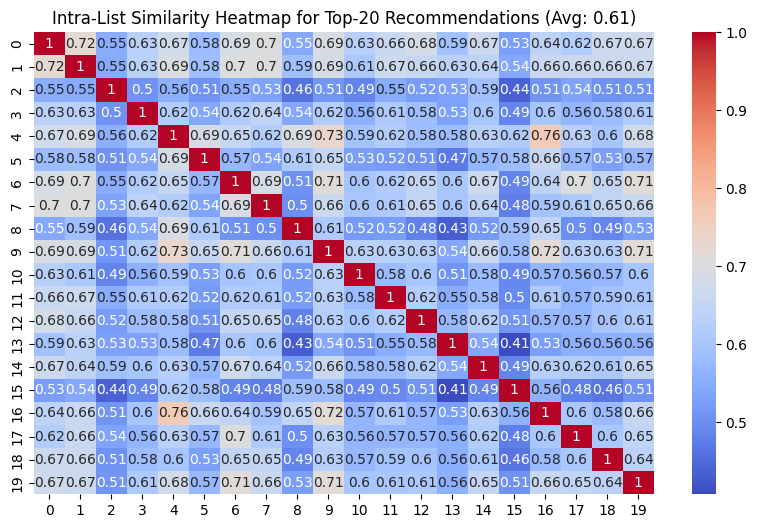

In [25]:
# Diversity of Recommendations (Intra-List Similarity)

top_n_similarities = cosine_similarity(recommended_papers_tfidf)  # N is 20 papers
avg_intra_similarity = np.mean(top_n_similarities)

plt.figure(figsize=(10, 6))
sns.heatmap(top_n_similarities, cmap="coolwarm", annot=True)
plt.title(f"Intra-List Similarity Heatmap for Top-{20} Recommendations (Avg: {avg_intra_similarity:.2f})")
plt.show()

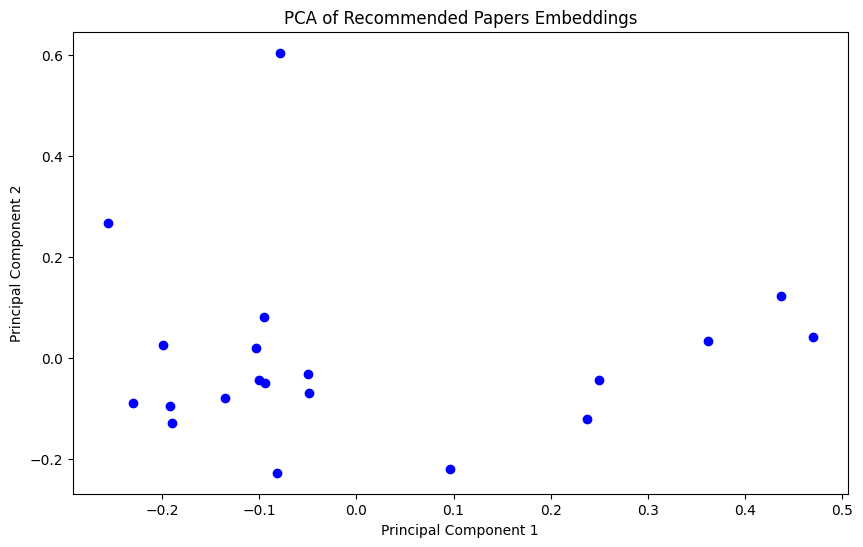

In [26]:
#PCA for Paper Embeddings

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(recommended_papers_tfidf)

plt.figure(figsize=(10, 6))
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c='blue', label='Recommended Papers')
plt.title("PCA of Recommended Papers Embeddings")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()